<a href="https://colab.research.google.com/github/Sushantstha2025/AI_worksheet/blob/main/2462001_Sushant_Shrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Copy of Human_Development_Index_Dataset.csv", encoding="latin-1")

print(df)

      Unnamed: 0       iso3      country  year    hdi  life_expectancy  \
0              1        AFG  Afghanistan  1990  0.284        45.967000   
1              2        AFG  Afghanistan  1991  0.292        46.663000   
2              3        AFG  Afghanistan  1992  0.299        47.596000   
3              4        AFG  Afghanistan  1993  0.307        51.466000   
4              5        AFG  Afghanistan  1994  0.300        51.495000   
...          ...        ...          ...   ...    ...              ...   
6793        6794  ZZK.WORLD        World  2018  0.735        72.816178   
6794        6795  ZZK.WORLD        World  2019  0.739        73.012121   
6795        6796  ZZK.WORLD        World  2020  0.736        72.257355   
6796        6797  ZZK.WORLD        World  2021  0.735        71.365524   
6797        6798  ZZK.WORLD        World  2022  0.739        72.004070   

      pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
0        10.694796       NaN  

In [2]:
print("unique years: ", df["year"].unique())

hdi_2022_df = df[df["year"] == 2022].copy()

unique years:  [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


In [3]:
print(hdi_2022_df.head(10))
print("Shape: ", hdi_2022_df.shape)
print(hdi_2022_df.info())


     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...               0.622   
65       2.842

In [4]:
print("Null values: \n", hdi_2022_df.isnull().sum())
print("Duplicates: \n", hdi_2022_df.duplicated().sum())

Null values: 
 Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64
Duplicates: 

In [5]:
# pandas le '-' lai string maanxa. Therefore, numeric column ma - aayo vane, pandas interpret it as plain text, so question le vaneko kunai pani numeric column ma - or plain text aayo vane teslai handle gar. i.e numeric columns stored as text
cols_to_fix = ["hdi", "gross_inc_percap", "life_expectancy"]
for col in cols_to_fix:
  hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col].replace('-', np.nan), errors="coerce")

hdi_2022_df.drop_duplicates(inplace=True)

hdi_2022_df["hdi"] = hdi_2022_df["hdi"].fillna(hdi_2022_df["hdi"].mean())



In [6]:
print("Mean HDI: ", hdi_2022_df["hdi"].mean())
print("Median HDI: ", hdi_2022_df["hdi"].median())
print("Standard Deviation of HDI: ", hdi_2022_df["hdi"].std())

highest_hdi = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmax(), "country"]  # maximum value find garxa with the help of idxmas function ra hamile kun id le specify garne vanera dina sakxau. Aile country vanne id le specify garne vaneko so that when printing the value, country ko name hos.
lowest_hdi = hdi_2022_df.loc[hdi_2022_df["hdi"].idxmin(), "country"]
print(f"highest: {highest_hdi}, lowest: {lowest_hdi}")

Mean HDI:  0.7228872549019609
Median HDI:  0.739
Standard Deviation of HDI:  0.1522804922705457
highest: Switzerland, lowest: Somalia


In [7]:
filtered_high_hdi = hdi_2022_df[hdi_2022_df["hdi"]>0.800]
top_10_gni = filtered_high_hdi.sort_values(by="gross_inc_percap", ascending=False).head(10)
print(top_10_gni)

      Unnamed: 0 iso3                 country  year    hdi  life_expectancy  \
3332        3333  LIE           Liechtenstein  2022  0.942           84.656   
4718        4719  QAT                   Qatar  2022  0.875           81.559   
5213        5214  SGP               Singapore  2022  0.949           84.133   
2705        2706  IRL                 Ireland  2022  0.950           82.716   
3398        3399  LUX              Luxembourg  2022  0.927           82.591   
6104        6105  ARE    United Arab Emirates  2022  0.937           79.196   
5609        5610  CHE             Switzerland  2022  0.967           84.255   
4322        4323  NOR                  Norway  2022  0.966           83.393   
6170        6171  USA           United States  2022  0.927           78.203   
2474        2475  HKG  Hong Kong, China (SAR)  2022  0.956           84.315   

      pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
3332      0.039327  0.924163  0.974295        86.

In [8]:
bins = [0.0, 0.550, 0.700, 0.800, np.inf]
labels = ["Low", "Medium", "High", "Very High"]

hdi_2022_df["HDI_category"] = pd.cut(hdi_2022_df["hdi"], bins=bins, labels=labels, right=False)  # normally right values are excluded in python. Loops ma pani, for i in range(0,10), garda, loop 9 choti samma chalxa. So when doing right = False, it says rather than excluding right value, include it.
print(hdi_2022_df[["country", "hdi", "HDI_category"]].head()) # to see if all countries are classified correctly
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

         country    hdi HDI_category
32   Afghanistan  0.462          Low
65       Albania  0.789         High
98       Algeria  0.745         High
131      Andorra  0.884    Very High
164       Angola  0.591       Medium


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hdi_1b_df = df[df["year"].isin([2020, 2021, 2022])].copy()
hdi_1b_df.to_csv("HDI_problem1B.csv", index=False)

In [10]:
print(hdi_1b_df[["hdi", "country", "year"]].isnull().sum())
numeric_cols = ["hdi", "gross_inc_percap"]
for col in numeric_cols:
  hdi_1b_df[col] = pd.to_numeric(hdi_1b_df[col].replace("-", np.nan), errors="coerce")

hdi_1b_df.drop_duplicates(inplace=True)

hdi_1b_df["hdi"] = hdi_1b_df["hdi"].fillna(hdi_1b_df["hdi"].mean())

hdi        8
country    0
year       0
dtype: int64


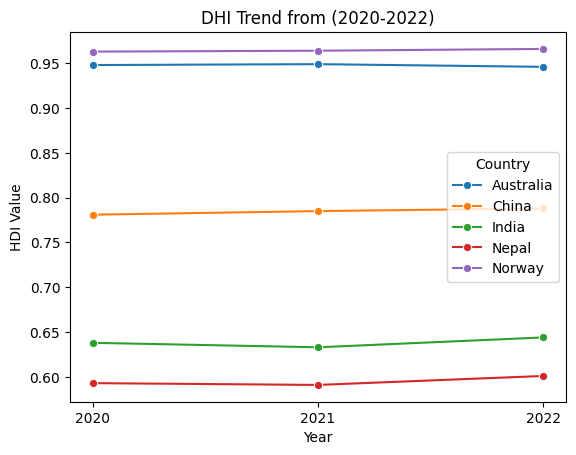

In [11]:
sample_countries = ["Nepal", "China", "Australia", "Norway", "India"]
subset = hdi_1b_df[hdi_1b_df["country"].isin(sample_countries)]

sns.lineplot(data=subset, x="year", y="hdi", hue="country", marker="o")
plt.title("DHI Trend from (2020-2022)")
plt.xlabel("Year")
plt.ylabel("HDI Value")
plt.legend(title="Country")
plt.xticks([2020, 2021, 2022])
plt.show()

In [13]:
# region and year

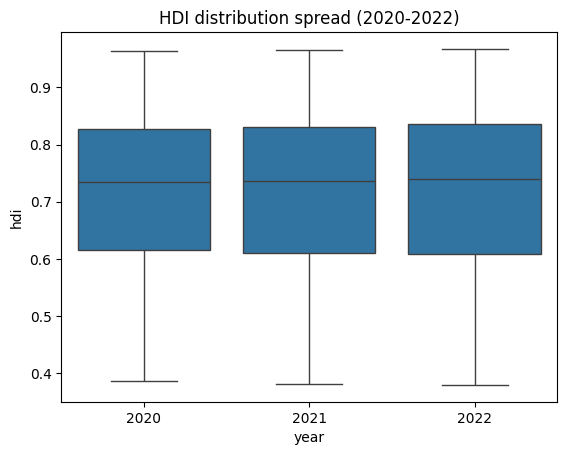

In [14]:
sns.boxplot(data=hdi_1b_df, x="year", y="hdi")
plt.title("HDI distribution spread (2020-2022)")
plt.show()

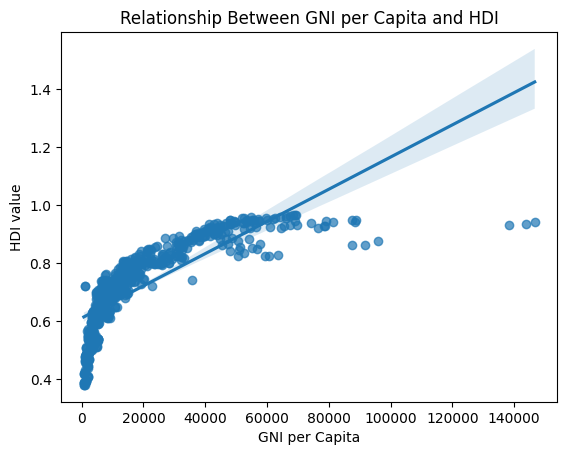

In [23]:
sns.regplot(data=hdi_1b_df, x = "gross_inc_percap", y = "hdi", scatter_kws = {"alpha":0.7})
plt.title("Relationship Between GNI per Capita and HDI")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI value")
plt.show()

In [24]:
pivot_df = hdi_1b_df.pivot(index="country", columns="year", values="hdi")
pivot_df["change"] = pivot_df[2022] - pivot_df[2020]

# greatest improved country
top_improvement = pivot_df["change"].idxmax()
print(f"Country with greatest improvement: {top_improvement}")

# countries that followed decline trend
declining_countries = pivot_df[pivot_df["change"]<0].index.tolist()  # 2022 ma jati change vako thiyo, tyo vanda badi 2020 ma vayo vane, negative value auxa bcz we are doing 2022 - 2020. Hence, less than 0 vako is declining countries
print(f"Countries with decline: {declining_countries}")


Country with greatest improvement: Andorra
Countries with decline: ['Afghanistan', 'Angola', 'Australia', 'Belize', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Costa Rica', 'Egypt', 'Eswatini (Kingdom of)', 'Gabon', 'Guatemala', 'Haiti', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kiribati', 'Lebanon', 'Lesotho', 'Lithuania', 'Malawi', 'Micronesia (Federated States of)', 'Moldova (Republic of)', 'Mozambique', 'Myanmar', 'Namibia', 'North Macedonia', 'Oman', 'Paraguay', 'Romania', 'Russian Federation', 'Saint Vincent and the Grenadines', 'Samoa', 'Serbia', 'Slovakia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Suriname', 'Syrian Arab Republic', 'Tanzania (United Republic of)', 'Timor-Leste', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Tuvalu', 'Ukraine', 'Yemen', 'Zimbabwe']


In [25]:
# defining list of south asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
hdi_south_asia = hdi_1b_df[hdi_1b_df["country"].isin(south_asian_countries)].copy()

hdi_south_asia.to_csv("HDI_SouthAsia.csv", index=False)

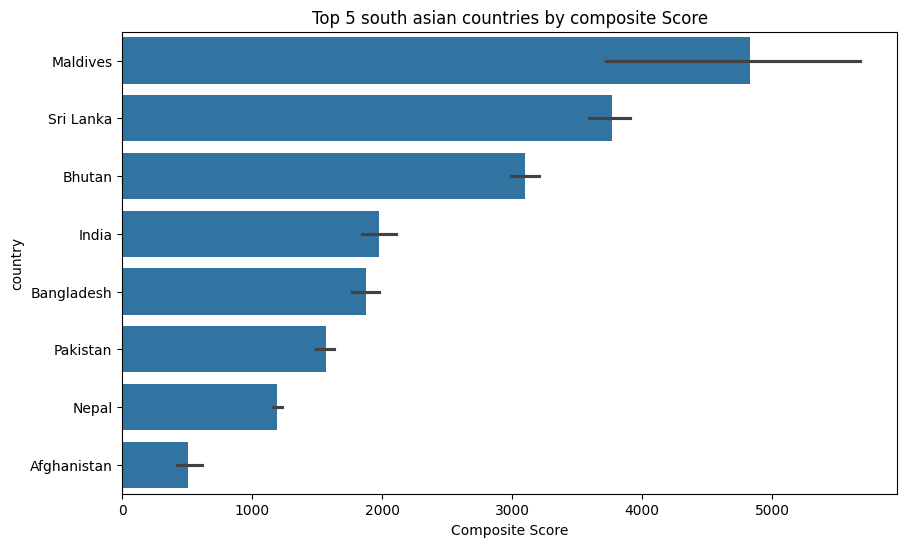

In [26]:
# composite score calculation
hdi_south_asia["composite_score"] = (0.3 * hdi_south_asia["life_expectancy"]) + (0.3*hdi_south_asia["gross_inc_percap"])
top_5_composite = hdi_south_asia.sort_values(by="composite_score", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=top_5_composite, x="composite_score", y="country")
plt.title("Top 5 south asian countries by composite Score")
plt.xlabel("Composite Score")
plt.show()

In [29]:
hdi_south_asia[["country", "composite_score", "hdi"]].sort_values(by="hdi", ascending=False)

,country,composite_score,hdi
5476,Sri Lanka,3910.566378,0.783
5477,Sri Lanka,3592.832541,0.780
5475,Sri Lanka,3799.859835,0.777
3530,Maldives,5678.289357,0.762
3529,Maldives,5081.257038,0.753
3528,Maldives,3723.426396,0.737
659,Bhutan,3209.130864,0.681
658,Bhutan,3093.768513,0.677
657,Bhutan,2990.462574,0.675
461,Bangladesh,1975.446053,0.670
